Association rules

In [1]:
def dict2str(item_dict):
    stringa = ""
    for key in item_dict.keys():
        item_str= " {}:{} ".format(key,item_dict[key])
        stringa+=item_str
    return stringa


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Numero di regole in funzione di supp e conf

## numero di regole per supp=20

In [3]:
supp=20
conf_range=np.arange(50,105,5)
Nrules_supp20 = []
for i,conf in enumerate(conf_range):
    df=pd.read_csv("../../data/rules/rules_supp{}_conf{}.csv".format(supp,conf))
#    df=df.query('Lift>1')
    Nrules_supp20.append(df.shape[0])
Nrules_supp20


[268, 241, 224, 220, 204, 191, 177, 135, 100, 94, 8]

In [4]:
## numero di regole per supp=10

In [5]:
supp=10
conf_range=np.arange(50,105,5)
Nrules_supp10 = []
for i,conf in enumerate(conf_range):
    df=pd.read_csv("../../data/rules/rules_supp{}_conf{}.csv".format(supp,conf))
#    df=df.query('Lift>1')
    Nrules_supp10.append(df.shape[0])
Nrules_supp10


[1480, 1339, 1240, 1191, 1098, 1062, 1007, 787, 650, 575, 69]

In [6]:
## numero di regole per supp=5

In [7]:
supp=5
conf_range=np.arange(50,105,5)
Nrules_supp5 = []
for i,conf in enumerate(conf_range):
    df=pd.read_csv("../../data/rules/rules_supp{}_conf{}.csv".format(supp,conf))
#    df=df.query('Lift>1')
    Nrules_supp5.append(df.shape[0])
Nrules_supp5


[6129, 5627, 5211, 4841, 4556, 4406, 4236, 3417, 2984, 2584, 289]

# Grafico numero di regole

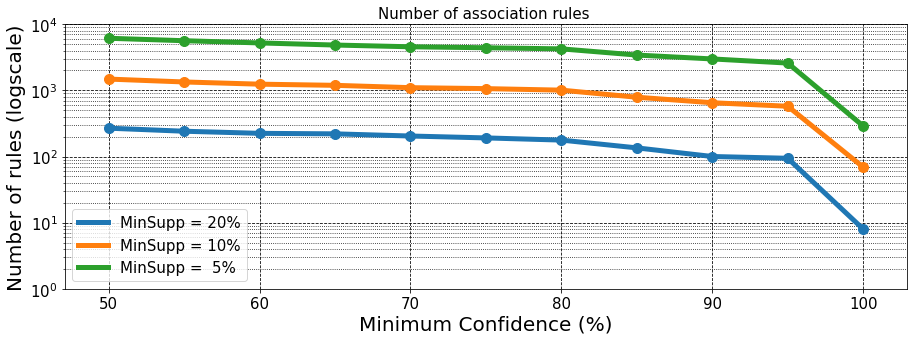

In [8]:
###########################################################
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y label
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', axisbelow=True)
###########################################################

fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(111)
plt.plot(conf_range,Nrules_supp20, label='MinSupp = 20%', linewidth=5)
plt.plot(conf_range,Nrules_supp10, label='MinSupp = 10%', linewidth=5)
plt.plot(conf_range,Nrules_supp5, label='MinSupp =  5%', linewidth=5)
plt.scatter(conf_range,Nrules_supp20,s=100)
plt.scatter(conf_range,Nrules_supp10,s=100)
plt.scatter(conf_range,Nrules_supp5,s=100)

plt.legend()

ax.set_yscale('log')

plt.xlabel('Minimum Confidence (%)')
plt.ylabel('Number of rules (logscale)')

plt.ylim(1,10000)

plt.grid(b=True, which='major', color='0', linestyle='--')
plt.grid(b=True, which='minor', color='0', linestyle=':')

plt.title("Number of association rules ")
plt.tight_layout()

plt.savefig("../../images/rules/andamentonumero.pdf")


In [9]:
###########################################################

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y label
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', axisbelow=True)
###########################################################

In [10]:
# funzione per convertire nome items

var_dict = {
    'T':'Time_Spend_Company',
    'D':'Department',
    'NP':'Number_Projects',
    'P':'Promotion_Last_5_Years',
    'L':'Left',
    'H':'Average_Montly_Hours',
    'WA':'Work_Accident',
    'LE':'Last_Evaluation',
    'S':'Salary',
    'SL':'Satisfaction_Level'
}

def item2dict(item):
    ## splitto la stringa
    item_split = item.split('_')
    # definisco la lista variabile,valore
    item_list = {var_dict[item_split[1]] : item_split[0]}
    return item_list




# regole generali

In [11]:
df = pd.read_csv("../../data/rules/rules_supp20_conf50.csv")
df.shape
#df_filtered = df.query('Supp>0.2') # perchè non è maggiore di 20???
#df_filtered = df_filtered.query('Lift>1')
df_general=df
df_general.describe()

             Supp        Conf        Lift
count  268.000000  268.000000  268.000000
mean     0.291664    0.819780    1.107843
std      0.102997    0.160764    0.261159
min      0.201000    0.500000    0.877000
25%      0.222750    0.709000    0.993000
50%      0.264000    0.851000    1.004000
75%      0.321750    0.976000    1.120000
max      0.839000    1.000000    2.070000

In [12]:
Cons_label=[]
df_general_plot=df_general.sort_values(by='Lift',ascending=False)

for i in range(df_general.shape[0]):
    Cons_label.append(dict2str(item2dict(df_general_plot.Consequent.iloc[i])))

df_general_plot['Consequent_']=Cons_label

df_general_plot.to_csv("../../code/rules/df_general.csv")



In [13]:
## grafico con R, vedi script code/rules/grafici.r

# vecchio grafico
"""
fig = plt.figure(figsize=(10,10))
plt.grid()
size= 5000*(df_general.Supp)**(2)
palette='Accent'
palette='viridis'


plt.scatter(x='Conf', y='Lift',data=df_general,s=size, alpha=0.7 ,c='Supp',cmap =plt.cm.get_cmap(palette,3))


cb = plt.colorbar(orientation='horizontal',extend='max',ticks=np.arange(0.20,0.70,0.10))
cb.set_label('Support')

plt.colorbar(extend='both')
plt.clim(0.2,0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title("Interest of Association rules, for Min Supp = 20%")
#plt.legend()
plt.tight_layout()

plt.savefig("../../images/rules/rules_supp20.pdf")
"""

In [14]:
df_general_interesting = df_general.query(" Lift  > 1.5")
df_general_interesting = df_general_interesting.sort_values(by=['Conf','Consequent','Supp'],ascending=False)
import sys
stdout= sys.stdout
sys.stdout = open('../../data/rules/rules_supp20.txt','w')
print( df_general_interesting.to_latex(index=False) )
#print( df[100:300].to_latex(index=False) )
sys.stdout=stdout

#df.query(" Conf<0.7 & Lift >1.8")[0:1].to_latex(index_names=False) 

##?df.to_latex()
df_general.describe()

             Supp        Conf        Lift
count  268.000000  268.000000  268.000000
mean     0.291664    0.819780    1.107843
std      0.102997    0.160764    0.261159
min      0.201000    0.500000    0.877000
25%      0.222750    0.709000    0.993000
50%      0.264000    0.851000    1.004000
75%      0.321750    0.976000    1.120000
max      0.839000    1.000000    2.070000

# Regole specifiche per supp=5

In [20]:

df = pd.read_csv("../../data/rules/rules_supp5_conf50.csv")
df.shape
#df_filtered = df.query('Supp>0.2') # perchè non è maggiore di 20???
#df_filtered = df_filtered.query('Lift>1')


df_specific=df.query('Conf>0.90 and Lift>1 and Supp<0.20')
df_specific.describe()

#df_specific.sort_values(by='Supp',ascending=False)
df_specific.describe()

              Supp         Conf         Lift
count  2479.000000  2479.000000  2479.000000
mean      0.076198     0.976061     1.955269
std       0.025711     0.024601     1.398641
min       0.050000     0.901000     1.001000
25%       0.055000     0.957000     1.018000
50%       0.066000     0.986000     1.294000
75%       0.091000     0.994000     2.247000
max       0.199000     1.000000     7.245000

In [21]:
Cons_label=[]
df_specific_plot=df_specific.sort_values(by='Lift',ascending=False)

for i in range(df_specific.shape[0]):
    Cons_label.append(dict2str(item2dict(df_specific_plot.Consequent.iloc[i])))

df_specific_plot['Consequent_']=Cons_label

df_specific_plot.to_csv("../../code/rules/df_specific.csv")


In [22]:
df_specific.sort_values(by="Lift",ascending=False).query("Lift>2 and Consequent=='low_SL' ")

    Consequent                                         Antecedent   Supp  \
147     low_SL   ('4_T', 'Y_L', 'insufficient_LE', 'intensive_H')  0.054   
142     low_SL  ('4_T', 'Y_L', 'insufficient_LE', 'intensive_H...  0.054   
130     low_SL  ('4_T', 'Y_L', 'insufficient_LE', 'intensive_H...  0.051   
136     low_SL  ('4_T', 'Y_L', 'insufficient_LE', 'intensive_H...  0.051   
163     low_SL           ('4_T', 'Y_L', 'insufficient_LE', 'N_P')  0.054   
167     low_SL                  ('4_T', 'Y_L', 'insufficient_LE')  0.054   
158     low_SL          ('4_T', 'Y_L', 'insufficient_LE', 'N_WA')  0.052   
153     low_SL   ('4_T', 'Y_L', 'insufficient_LE', 'N_WA', 'N_P')  0.051   
214     low_SL  ('4_T', 'insufficient_LE', 'intensive_H', 'N_WA')  0.058   
209     low_SL  ('4_T', 'insufficient_LE', 'intensive_H', 'N_W...  0.058   
223     low_SL          ('4_T', 'insufficient_LE', 'intensive_H')  0.063   
219     low_SL   ('4_T', 'insufficient_LE', 'intensive_H', 'N_P')  0.062   
283     low_

# grafico con R , vedi script grafici.r

NameError: name 'df_filtered' is not defined

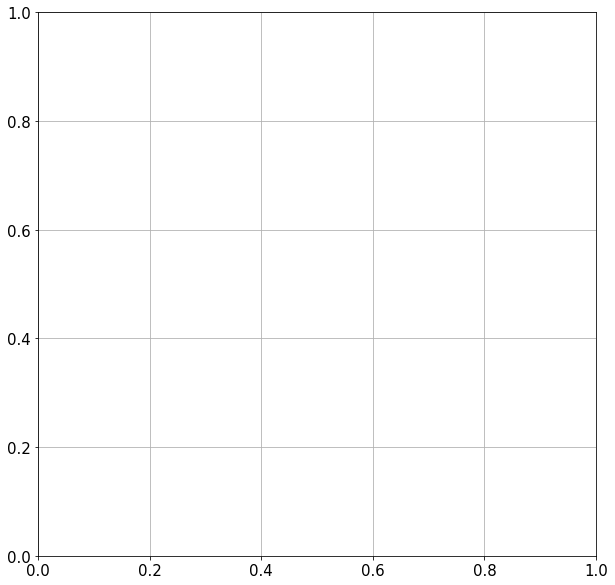

NameError: name 'df_filtered' is not defined

In [23]:
plt.close()
fig = plt.figure(figsize=(10,10))
plt.grid()
size= 2000*(df_filtered.Supp)**(1)
plt.scatter(x='Lift', y='Conf',data=df_filtered,s=size, alpha=0.7 ,c='Supp',cmap =plt.cm.get_cmap('Accent',3))

plt.clim(0.05,0.2)
cb = plt.colorbar(extend='max',orientation='horizontal',ticks=np.arange(0.05,0.70,0.05))
cb.set_label('Support')


plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title("Interest of Association rules, for Min Supp = 5%")
#plt.legend()
plt.tight_layout()

plt.savefig("../../images/rules/rules_supp5.pdf")

In [24]:
def dict2str(item_dict):
    stringa = ""
    for key in item_dict.keys():
        item_str= " {}:{} ".format(key,item_dict[key])
        stringa+=item_str
    return stringa


In [25]:
#conf_min=0.6
df_plot = df_filtered.query("Lift>0.2 and Conf> 0.6 and Supp>0.01").sort_values(by=["Lift","Consequent"],ascending=False)

Cons_label=[]

for i in range(df_plot.shape[0]):
    Cons_label.append(dict2str(item2dict(df_plot.Consequent.iloc[i])))

df_plot['Cons_label']=Cons_label
df_plot.describe()

NameError: name 'df_filtered' is not defined

In [26]:
sns.set_style('whitegrid')

size= 2000*(df_filtered.Supp)**(1)

sns.set_palette("Paired")

"""
left_plot = sns.lmplot(x='Lift',y='Conf',data=df_plot,hue='Cons_label',fit_reg=True,
                       aspect=(20/10), scatter_kws={"s": 150},
                       legend_out=True,palette='Paired')
"""
#left_plot.map(plt.errorbar, "Lift", "Conf", "Supp", marker="o")

left_plot._legend.set_title("Consequent ")

plt.ylim(0.45,1.05)
plt.ylim(0.6,1.05)
#plt.xlim(0.5,8.1)

plt.axvline(1,color='r',linestyle="--")

sns.set_palette("Paired")
plt.title("Association rules for MinSupp = 5%")


left_plot.savefig("../../images/rules/left_scatter.pdf")
#plt.scatter(x='Conf', y='Lift',data=df_filtered,s=size, alpha=0.7 ,c='Consequent',cmap =plt.cm.get_cmap('Accent',3))




NameError: name 'sns' is not defined

In [46]:
import sys
stdout= sys.stdout
sys.stdout = open('../../data/rules/rules_supp5.txt','w')
print( df_interesting.to_latex(index=False) )
sys.stdout=stdout

##?df.to_latex()



In [27]:
# funzione che converte la parte antecedent in lista di dizionari

from ast import literal_eval

def antecedent2list(antecedent_str):
    antecedent_tuple = literal_eval(antecedent_str)

    out_list = []
    for item in antecedent_tuple:
        out_list.append(item2dict(item=item))
        
    return out_list


def antecedent2dict(antecedent_str):
    """converte la singola parte antecedente 
    in dizionario """

    antecedent_tuple = literal_eval(antecedent_str)

    out_list = {}
    for item in antecedent_tuple:
        out_list.update(item2dict(item=item))
        
    return out_list


#esempio
#out= antecedent2list(df.Antecedent[45])
#out2 = antecedent2dict(df.Antecedent[45])

#df.Antecedent[45]





In [28]:
def antecedent2set(antecedent_str):
    antecedent_tuple = literal_eval(antecedent_str)

    out_list = []
    for item in antecedent_tuple:
        out_list.append(item2dict(item=item))

    out_list=set(out_list)        
        
    return out_list


In [29]:

rule=df_left.iloc[0]
antecedent_str=rule.Antecedent


antecedent_tuple = literal_eval(antecedent_str)
out_set=set(antecedent_tuple)






NameError: name 'df_left' is not defined

In [30]:
#rule.Antecedent
rule
#antecedent2set(rule.Antecedent)

NameError: name 'rule' is not defined

In [31]:
def df2df_list(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2list(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        


def df2df_dict(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2dict(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        










In [32]:
def df2df_set(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(set(literal_eval(item)))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        


# Analisi regole Per LEFT

In [42]:

df = pd.read_csv("../../data/rules/rules_supp5_conf50.csv")
df.shape
#df_filtered = df.query('Supp>0.2') # perchè non è maggiore di 20???
#df_filtered = df_filtered.query('Lift>1')
df_left = df.query(" Consequent=='Y_L'")

df_left.to_csv("../../code/rules/df_left_all.csv")
df_left.describe()


             Supp        Conf        Lift
count  264.000000  264.000000  264.000000
mean     0.070557    0.811826    3.409856
std      0.020260    0.131242    0.551197
min      0.050000    0.507000    2.131000
25%      0.053000    0.720750    3.028000
50%      0.061500    0.852500    3.580500
75%      0.086000    0.924250    3.882500
max      0.154000    0.977000    4.103000

In [38]:
lista_minconf= [0.85,0.9,0.95]
df_left_c85 = df.query(" Consequent=='Y_L' and Conf>=0.85")
df_left_c85.to_csv("../../data/rules/rules_left_class_c85.csv")

df_left_c90 = df.query(" Consequent=='Y_L' and Conf>=0.90")
df_left_c90.to_csv("../../data/rules/rules_left_class_c90.csv")

df_left_c95 = df.query(" Consequent=='Y_L' and Conf>=0.95")
df_left_c95.to_csv("../../data/rules/rules_left_class_c95.csv")

df_left_c90.describe()


            Supp       Conf       Lift
count  88.000000  88.000000  88.000000
mean    0.067239   0.939148   3.944693
std     0.016871   0.021647   0.091208
min     0.050000   0.900000   3.778000
25%     0.053000   0.924750   3.883500
50%     0.059000   0.940000   3.947500
75%     0.082250   0.957000   4.020000
max     0.101000   0.977000   4.103000

In [39]:
df_left = df_left.sort_values(by=['Supp','Conf','Antecedent','Supp','Conf'],ascending=False)


# Carico le best rules, dopo il pruning dell'altro notebook

In [110]:
df_pruned = pd.read_csv("../../data/rules/pruned_rules.csv")

indici_pruned = df_pruned.iloc[:,0]

## attenzionee sto rinominando df_left!!!
df_left = df_left.loc[indici_pruned]

df_left.describe()

            Supp       Conf       Lift
count  14.000000  14.000000  14.000000
mean    0.071714   0.926143   3.889500
std     0.018235   0.013581   0.057535
min     0.053000   0.905000   3.800000
25%     0.055000   0.918250   3.855750
50%     0.062000   0.925500   3.885500
75%     0.086000   0.935000   3.927500
max     0.101000   0.952000   3.999000

In [111]:
# exporto le regole buone in formato tupla
df_left.to_csv("../../data/rules/pruned_rules_ok.csv")

In [115]:
#converto in dizionario
df_left_dict=df2df_dict(df_left)

ant = df_left_dict.Antecedent
N_items = []
for i,ant in enumerate(df_left_dict.Antecedent):
    N_items.append(len(df_left_dict.Antecedent.iloc[i]))

df_left_dict['N_items_Ant']=N_items
df_left_dict.sort_values(by='N_items_Ant').head()
df_left_dict['Supp_left']=df_left_dict.Supp/0.24
df_left_dict['Supp_'] = df_left_dict['Supp'].round(2)
df_left_dict['Conf_'] = df_left_dict['Conf'].round(2)
df_left_dict.drop(['Supp','Conf'],axis=1, inplace=True)

df_left_dict.columns=['Lift','Antecedent','Consequent','N_items_Ant','Supp_Left','Supp','Conf']
df_left_dict.columns

df_left_dict.head()


       Lift                                         Antecedent  \
1015  3.936  {u'Last_Evaluation': u'insufficient', u'Time_S...   
919   3.842  {u'Satisfaction_Level': u'medium', u'Last_Eval...   
2629  3.861  {u'Salary': u'low', u'Satisfaction_Level': u'm...   
915   3.854  {u'Satisfaction_Level': u'medium', u'Last_Eval...   
899   3.902  {u'Satisfaction_Level': u'medium', u'Last_Eval...   

           Consequent  N_items_Ant  Supp_Left  Supp  Conf  
1015  {u'Left': u'Y'}            3   0.358333  0.09  0.94  
919   {u'Left': u'Y'}            3   0.362500  0.09  0.92  
2629  {u'Left': u'Y'}            4   0.220833  0.05  0.92  
915   {u'Left': u'Y'}            4   0.358333  0.09  0.92  
899   {u'Left': u'Y'}            4   0.358333  0.09  0.93  

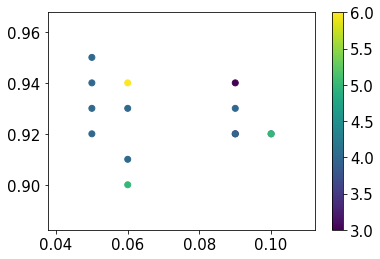

In [116]:
plt.scatter(x='Supp',y='Conf', c='N_items_Ant',  data=df_left_dict)
plt.colorbar()

# pre-filtering

In [117]:
# p
df_left_best_dict=df_left_dict.query('Supp>0.04 and Conf>0.5 and N_items_Ant<=20').sort_values(by=['N_items_Ant','Conf'],ascending=True)
df_left_best_dict.describe()
#df_left_best_dict.iloc[0].Antecedent
df_left

     Consequent                                         Antecedent   Supp  \
1015        Y_L                 ('2_NP', 'insufficient_LE', '3_T')  0.086   
919         Y_L           ('2_NP', 'insufficient_LE', 'medium_SL')  0.087   
2629        Y_L   ('insufficient_LE', 'medium_SL', '3_T', 'low_S')  0.053   
915         Y_L    ('2_NP', 'insufficient_LE', 'medium_SL', 'N_P')  0.086   
899         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', 'stan...  0.086   
875         Y_L  ('2_NP', 'insufficient_LE', 'medium_SL', 'low_S')  0.053   
1039        Y_L  ('2_NP', 'insufficient_LE', 'low_S', 'standard...  0.053   
971         Y_L        ('2_NP', 'insufficient_LE', '3_T', 'low_S')  0.053   
1147        Y_L              ('2_NP', 'medium_SL', '3_T', 'low_S')  0.062   
1171        Y_L         ('2_NP', 'medium_SL', '3_T', 'standard_H')  0.101   
1295        Y_L             ('2_NP', '3_T', 'low_S', 'standard_H')  0.062   
1166        Y_L  ('2_NP', 'medium_SL', '3_T', 'standard_H', 'N_P')  0.100   

In [118]:
# rimuovo regole semanticamente non interessanti
# rimuovo le regole che contengono Work_accident:N nella parte antecedente
## selezione le row che contengono

lista_drop=[]
lista_ant=list(df_left_best_dict.Antecedent)

for i,ant in enumerate(lista_ant):
    #print ant
    if('Work_Accident' in ant.keys()):
        if(ant['Work_Accident']=='N'):
            lista_drop.append(i)
            #print(i)
    
df_left_best_dict =df_left_best_dict.drop(df_left_best_dict.index[lista_drop])
#df_left_best_dict.index[0]           
#df_left_best_dict.iloc[lista_drop[10]].Antecedent
df_left_best_dict.describe()

            Lift  N_items_Ant  Supp_Left       Supp       Conf
count  14.000000    14.000000  14.000000  14.000000  14.000000
mean    3.889500     4.142857   0.298810   0.071429   0.926429
std     0.057535     0.770329   0.075981   0.020327   0.013363
min     3.800000     3.000000   0.220833   0.050000   0.900000
25%     3.855750     4.000000   0.229167   0.052500   0.920000
50%     3.885500     4.000000   0.258333   0.060000   0.925000
75%     3.927500     4.000000   0.358333   0.090000   0.937500
max     3.999000     6.000000   0.420833   0.100000   0.950000

In [119]:
# lista degli items
df_rules = df_left_best_dict.sort_values(by=["N_items_Ant","Conf"],ascending=False)
#df_rules.head()
#df_rules.to_csv("../../data/rules/best_rules_left.csv")

In [120]:
lista_items=[]
for i in range(df_rules.shape[0]): 
    antecedent = df_rules.Antecedent.iloc[i]
    for key in antecedent.keys():
        lista_items.append( "{}:{}".format(key,antecedent[key]))

lista_items = list(set(lista_items)) # elementi unici
lista_items

['Average_Montly_Hours:standard',
 'Salary:low',
 'Last_Evaluation:insufficient',
 'Satisfaction_Level:medium',
 'Promotion_Last_5_Years:N',
 'Time_Spend_Company:3',
 'Number_Projects:2']

In [121]:
# adesso per ogni regola (riga del dataframe) voglio vedere quali elementi ci sono:1 c'è 0 non c'è
# per prima cosa dev
df = df_rules.copy()

antecedent_col=[]

for antecedent in list(df.Antecedent):
    antecedent_items=[]
    #antecedent = df.Antecedent.iloc[0]
    for key in antecedent.keys():
        antecedent_items.append( "{}:{}".format(key,antecedent[key]))    
    antecedent_col.append(antecedent_items)

df['antecedent_list']=antecedent_col
df.head()

       Lift                                         Antecedent  \
1117  3.955  {u'Salary': u'low', u'Satisfaction_Level': u'm...   
1166  3.884  {u'Promotion_Last_5_Years': u'N', u'Satisfacti...   
1290  3.800  {u'Salary': u'low', u'Promotion_Last_5_Years':...   
971   3.999  {u'Salary': u'low', u'Last_Evaluation': u'insu...   
875   3.958  {u'Salary': u'low', u'Satisfaction_Level': u'm...   

           Consequent  N_items_Ant  Supp_Left  Supp  Conf  \
1117  {u'Left': u'Y'}            6   0.254167  0.06  0.94   
1166  {u'Left': u'Y'}            5   0.416667  0.10  0.92   
1290  {u'Left': u'Y'}            5   0.254167  0.06  0.90   
971   {u'Left': u'Y'}            4   0.220833  0.05  0.95   
875   {u'Left': u'Y'}            4   0.220833  0.05  0.94   

                                        antecedent_list  
1117  [Salary:low, Satisfaction_Level:medium, Number...  
1166  [Promotion_Last_5_Years:N, Satisfaction_Level:...  
1290  [Salary:low, Promotion_Last_5_Years:N, Average...  
971 

In [122]:
# adesso controllo per ogni regola quali items ci sono
row = df.antecedent_list.iloc[0]
lista_rules=[]

for i in range(df.shape[0]):

    row = df.iloc[i]
    r1 = [] #singola regola
    #print row.antecedent_list
    
    for i,item in enumerate(lista_items): #ciclo sulla lista degli items
        r1.append(lista_items[i] in row.antecedent_list) 

    r1.append(row.Conf) # aggiungo anche la confidence
    r1.append(row.Supp) # aggiungo anche il support
    r1.append(row.Supp_Left) # aggiungo anche il support

    lista_rules.append(r1)

#fine
lista_rules
lista_items.append('Conf')
lista_items.append('Supp')
lista_items.append('Supp_Left')

lista_items

['Average_Montly_Hours:standard',
 'Salary:low',
 'Last_Evaluation:insufficient',
 'Satisfaction_Level:medium',
 'Promotion_Last_5_Years:N',
 'Time_Spend_Company:3',
 'Number_Projects:2',
 'Conf',
 'Supp',
 'Supp_Left']

In [123]:
        
#type(lista_rules)
#len(lista_items)
df_rules_matrix = pd.DataFrame(lista_rules)#.transpose()
df_rules_matrix.columns= lista_items

df_rules_matrix.head()
## ATTENTION TO THE REORDER!!!!!
## ATTENTION TO THE REORDER!!!!!
## ATTENTION TO THE REORDER!!!!!
df_rules_matrix=df_rules_matrix.sort_values(by=['Supp'],ascending=False)
"""df_rules_matrix=df_rules_matrix.sort_values(by=['Conf',
    'Number_Projects:2',
                                               'Time_Spend_Company:3',
                                                'Last_Evaluation:insufficient',
                                                 'Satisfaction_Level:medium',
                                                'Promotion_Last_5_Years:N',
                                                'Salary:0'
])

"""
"""
df_rules_matrix=df_rules_matrix[['Number_Projects:2',
                                               'Time_Spend_Company:3',
                                                'Last_Evaluation:insufficient',
                                                 'Satisfaction_Level:medium',
                                                'Promotion_Last_5_Years:N',
                                'Salary:0','Conf','Supp'
                                 
]]
"""
#print df_rules_matrix
df_heatmap=df_rules_matrix.replace([True,False],[10,0]).transpose()
df_heatmap

                                      1          10         5          9   \
Average_Montly_Hours:standard  10.000000  10.000000  10.000000   0.000000   
Salary:low                      0.000000   0.000000   0.000000   0.000000   
Last_Evaluation:insufficient    0.000000   0.000000  10.000000  10.000000   
Satisfaction_Level:medium      10.000000  10.000000  10.000000  10.000000   
Promotion_Last_5_Years:N       10.000000   0.000000   0.000000  10.000000   
Time_Spend_Company:3           10.000000  10.000000   0.000000   0.000000   
Number_Projects:2              10.000000  10.000000  10.000000  10.000000   
Conf                            0.920000   0.920000   0.930000   0.920000   
Supp                            0.100000   0.100000   0.090000   0.090000   
Supp_Left                       0.416667   0.420833   0.358333   0.358333   

                                      12       13         0          2   \
Average_Montly_Hours:standard   0.000000   0.0000  10.000000  10.000000   
Sa

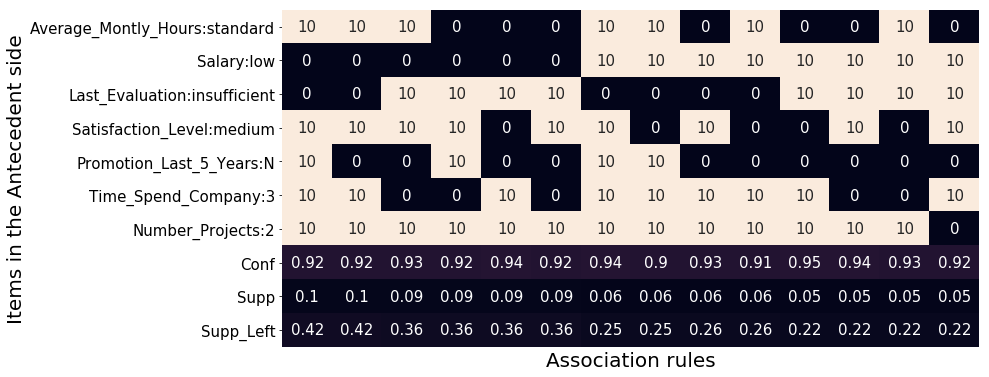

In [124]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(14,5.5))   
heat=sns.heatmap(df_heatmap,annot=True,cbar=False,xticklabels=False)
plt.xlabel('Association rules')
plt.ylabel('Items in the Antecedent side')      
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("../../images/rules/left_heatmap.pdf")

In [123]:
df_rules.query("Conf==0.96").N_items_Ant



index_best_rule  = 664
best_rule = df_left.loc[664]
best_rule#.Antecedent
best_rule.to_csv("../../data/rules/best_rule.csv")




In [1141]:
df_rules.query('Conf>0.95').iloc[0].Antecedent

{'Average_Montly_Hours': 'standard',
 'Last_Evaluation': 'insufficient',
 'Number_Projects': '2',
 'Satisfaction_Level': 'medium',
 'Time_Spend_Company': '3'}

In [40]:
#item_dict = df_left_best_dict_filtered.iloc[0].Antecedent
#print item_dict


#dict2str(item_dict)


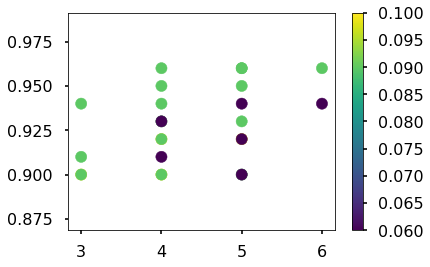

In [787]:
plt.scatter(x='N_items_Ant',y='Conf', c='Supp',  data=df_left_best_dict_filtered)
plt.colorbar()

In [678]:
import sys
stdout= sys.stdout
sys.stdout = open('../../data/rules/rules_left.txt','w')
print( df_left_best_dict_filtered.to_latex(index=False) )
sys.stdout=stdout

##?df.to_latex()



# Conversione DataFrame

In [16]:
variables = ['Time_Spend_Company',
            'Department',
            'Number_Projects',
            'Promotion_Last_5_Years',
            'Left',
            'Average_Montly_Hours',
            'Work_Accident',
            'Last_Evaluation',
            'Salary',
            'Satisfaction_Level']

other_columns = ['Antecedent','Consequent','Supp','Conf','Lift']

from copy import copy
columns = copy(variables)

for col in other_columns:
    columns.append(col)


In [18]:
var_dict = {
    'T':'Time_Spend_Company',
    'D':'Department',
    'NP':'Number_Projects',
    'P':'Promotion_Last_5_Years',
    'L':'Left',
    'H':'Average_Montly_Hours',
    'WA':'Work_Accident',
    'LE':'Last_Evaluation',
    'S':'Salary',
    'SL':'Satisfaction_Level'
}

def item2dict(item):
    ## splitto la stringa
    item_split = item.split('_')
    # definisco la lista variabile,valore
    item_list = {var_dict[item_split[1]] : item_split[0]}
    return item_list



item=df.Consequent[20]
item2dict(item)
#item

{'Promotion_Last_5_Years': 'N'}

In [520]:
item_dict = item2dict(item)

def dict2str(item_dict):
    for key in item_dict.keys():
        item_str= "{}:{}".format(key,item_dict[key])
    return item_str

dict2str(item_dict)


'Work_Accident:N'

In [521]:
# funzione che converte la parte antecedent in lista di dizionari

from ast import literal_eval

def antecedent2list(antecedent_str):
    antecedent_tuple = literal_eval(antecedent_str)

    out_list = []
    for item in antecedent_tuple:
        out_list.append(item2dict(item=item))
        
    return out_list


def antecedent2dict(antecedent_str):
    """converte la singola parte antecedente 
    in dizionario """

    antecedent_tuple = literal_eval(antecedent_str)

    out_list = {}
    for item in antecedent_tuple:
        out_list.update(item2dict(item=item))
        
    return out_list


#esempio
out= antecedent2list(df.Antecedent[45])
out2 = antecedent2dict(df.Antecedent[45])

df.Antecedent[45]

out2.keys()
out2


{'Department': '3', 'Left': 'N'}

In [ ]:
def df2df_list(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2list(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        


def df2df_dict(df):
    """funzione che converte 
    le stringhe relative alle regole in 
    liste di dizionari """

    df_new = df.copy()

    df_new = df_new.drop(['Antecedent','Consequent'],axis=1)

    Antecedent=[]
    for i,item in enumerate(df.Antecedent):
        Antecedent.append(antecedent2dict(item))

    df_new=df_new.assign(Antecedent=Antecedent)

    Consequent=[]
    for i,item in enumerate(df.Consequent):
        Consequent.append(item2dict(item))

    df_new=df_new.assign(Consequent=Consequent)
        
    return df_new        



# Analisi in frequenza delle regole per LEFT

In [313]:
# converto in dizionario 
df_left_best_dict = df2df_dict(df_left)
#df_left_best_dict.head()

     Supp  Conf  Lift                                         Antecedent  \
591  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
599  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
607  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
614  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   
622  0.05  0.98   4.1  {u'Salary': u'0', u'Satisfaction_Level': u'med...   

          Consequent  
591  {u'Left': u'Y'}  
599  {u'Left': u'Y'}  
607  {u'Left': u'Y'}  
614  {u'Left': u'Y'}  
622  {u'Left': u'Y'}  

In [786]:
dict_values = (df_left_best_dict_filtered.Antecedent.iloc[0])
#dict_values.keys()
dict_values

{'Average_Montly_Hours': 'standard',
 'Last_Evaluation': 'insufficient',
 'Number_Projects': '2',
 'Promotion_Last_5_Years': 'N',
 'Salary': '0',
 'Satisfaction_Level': 'medium',
 'Time_Spend_Company': '4'}

In [315]:

lista_items=[]
lista_counts=[]

for variable in dict_values.keys():

    print(variable)
    #lista valori associata alla variabile
    lista_values = (dict_values[variable])
    #print(lista_values)

    if (len(lista_values)==0):
        break
    
    # estraggo i valori unici:n
    uniques = [lista_values[0]] #inizializzo col primo valore
    for value in lista_values:
        if(value not in uniques):
            uniques.append(value)
    # conto i valori per ciascun item unico
    uniques_counts=[]
    for i,unique in enumerate(uniques):
        uniques_counts.append(0)
        for value in lista_values:
            if (value ==unique) :
                uniques_counts[i]+=1

    # definisco gli items e li aggiungo alla lista complessiva
    for unique in uniques:
        lista_items.append("{} : {}".format(variable,unique))

    # aggiungo i counts alla lista complessiva    
    lista_counts=lista_counts+uniques_counts

#uniques_counts
#uniques
lista_items
lista_counts

Salary
Satisfaction_Level
Last_Evaluation
Work_Accident
Number_Projects
Department


[49, 55, 65, 45, 73]

In [59]:
lista_items

['Average_Montly_Hours:standard',
 'Salary:low',
 'Last_Evaluation:insufficient',
 'Satisfaction_Level:medium',
 'Promotion_Last_5_Years:N',
 'Time_Spend_Company:3',
 'Number_Projects:2',
 'Conf',
 'Supp']

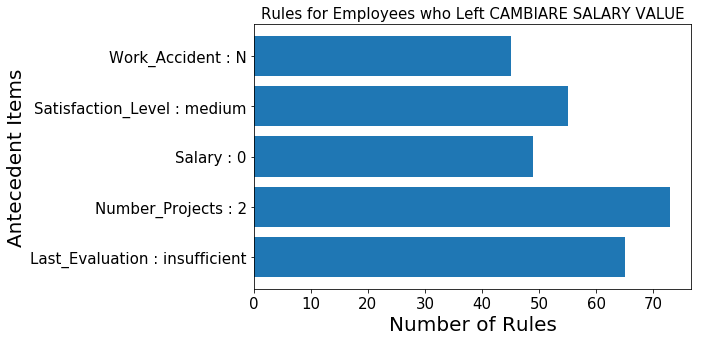

In [320]:
fig = plt.figure(figsize=(10,5))

x=lista_items
y= lista_counts
#y=np.array(lista_counts)/max(np.array(lista_counts))
plt.barh(x,y)
plt.ylabel('Antecedent Items')
plt.xlabel('Number of Rules')
plt.title('Rules for Employees who Left CAMBIARE SALARY VALUE')
plt.tight_layout()
plt.savefig("../../images/rules/rules_left.pdf")

In [300]:
prova= np.array(lista_counts)/max(np.array(lista_counts))
#max(prova)
prova

array([0, 0, 1, 0, 1])